<a href="https://colab.research.google.com/github/adithyanum/titanic-survival-ml/blob/main/titanic_survivor_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataSet

# # 🛳️ Titanic Survival Prediction Using Machine Learning

This notebook walks through a complete end-to-end machine learning project:
- Exploratory Data Analysis (EDA)
- Data Cleaning and Preprocessing
- Feature Engineering
- Model Training and Evaluation
- Hyperparameter Tuning
- Model Saving

Goal: Predict whether a passenger survived the Titanic disaster based on features like age, class, gender, etc.


## 📄 Load the Dataset

We load the Titanic dataset directly from a URL and view its structure.



In [88]:
import pandas as pd

In [89]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [91]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## 🧼 Data Cleaning

We handle missing values and convert categorical variables to numerical using encoding techniques.



In [93]:
df.drop(['Cabin', "Ticket", "Name"], axis = 1, inplace = True)

In [94]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [95]:
df["Age"].fillna(df["Age"].median(), inplace = True)

In [96]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [97]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace = True)

In [98]:
df["Sex"] = df["Sex"].map({"male" : 0, "female" : 1})

In [99]:
df = pd.get_dummies(df, columns= ["Embarked"], drop_first = True, dtype = int)

## 🎯 Feature and Target Selection

We separate the target column `Survived` from the rest of the features to prepare for training.


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [101]:
X = df.drop(["Survived"], axis = 1)
y = df["Survived"]

## 🧪 Train-Test Split

We split the data into training and testing sets using an 80-20 ratio.


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

## 🌲 Model Training

We train a Random Forest Classifier for its reliability and built-in feature importance capability.


In [103]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
df.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,1
1,2,1,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,1
5,6,0,3,0,28.0,0,0,8.4583,1,0
6,7,0,1,0,54.0,0,0,51.8625,0,1
7,8,0,3,0,2.0,3,1,21.0750,0,1
8,9,1,3,1,27.0,0,2,11.1333,0,1
9,10,1,2,1,14.0,1,0,30.0708,0,0


In [105]:
y_pred = model.predict(X_test)

## ✅ Accuracy Evaluation

We print the accuracy score of the model to understand its initial performance.


In [106]:
print("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## 🔍 Feature Importance Visualization

We extract and visualize which features the model thinks are most important for predicting survival.


In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
importances = model.feature_importances_

In [109]:
feature_names = X.columns

In [110]:
feature_df = pd.DataFrame({"Feature" : feature_names, "Importance" : importances})

In [111]:
feature_df

,Feature,Importance
0,PassengerId,0.191314
1,Pclass,0.082606
2,Sex,0.258937
3,Age,0.167335
4,SibSp,0.043124
5,Parch,0.030700
6,Fare,0.197493
7,Embarked_Q,0.007775
8,Embarked_S,0.020716


In [112]:
feature_df.sort_values(by = 'Importance', ascending = False, inplace = True)

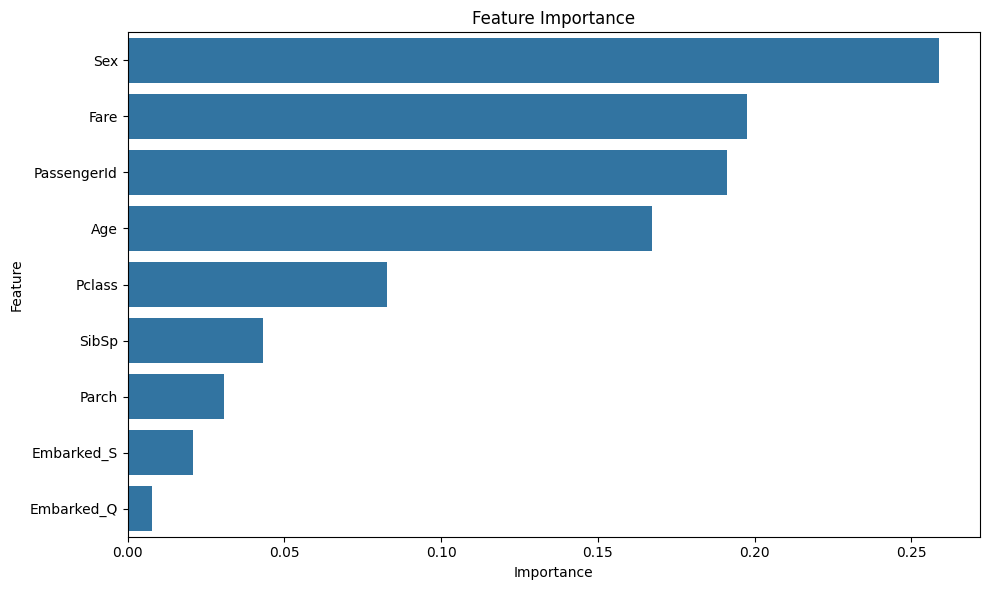

In [113]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y = 'Feature', data=feature_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

## 🧠 Hyperparameter Tuning

We use GridSearchCV to find the best settings (like number of trees, depth, etc.) for the model to improve accuracy.


In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [115]:
param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [None, 5, 10],
    'min_samples_split' : [2, 5, 10]
}

In [116]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state=42),
                           param_grid = param_grid,
                           cv = 5,
                           scoring = 'accuracy',
                           n_jobs = -1)

In [117]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [118]:
print("Best Parameters : ", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)

Best Parameters :  {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best Score :  0.8370432384516893


In [119]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy with best model : ", test_accuracy)

Test Accuracy with best model :  0.8100558659217877


In [120]:
from sklearn.metrics import confusion_matrix

In [121]:
y_pred = best_model.predict(X_test)

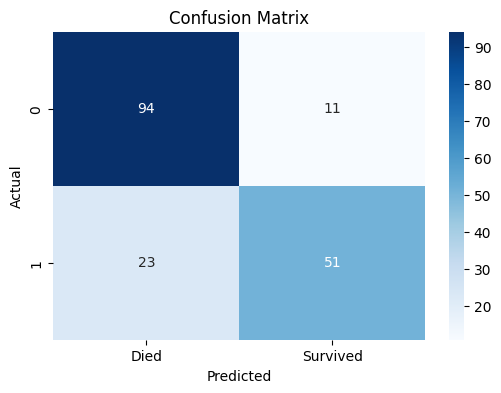

In [122]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Died', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



## 💾 Save the Model

We save the trained model to disk using `joblib`, so we can reuse it later or deploy it in an app or service.


In [124]:
import joblib

In [125]:
joblib.dump(best_model, 'titanic_random_forest_model.pkl')

['titanic_random_forest_model.pkl']

In [126]:
loaded_model = joblib.load('titanic_random_forest_model.pkl')

In [127]:
loaded_model.predict(X_test[:5])

array([0, 0, 0, 1, 1])

📈 Results

Accuracy Achieved: ~80%

Best performing model: Random Forest Classifier with tuned parameters

Key insights: Features like Sex, Fare, and Pclass had the highest impact on survival